Implement decryption algorithm outlined in Persi Diaconis: "The Markov Chain Monte Carlo Revolution"

v2:

*  Fixed mistake in `plausibility`: initial value of `logprod` should have been 0 not 1

* added graphs that show how the plausibility function changes as the chain is run

* added using letter frequencies to construct initial key

In [ ]:
import numpy as np
from numpy.random import default_rng
rng = default_rng()
import matplotlib.pyplot as plt

### Character coding and decoding

Convention: 1=A, ..., 26 = Z, 0=everything else.  Use capital letters only.

In [ ]:
def my_char_to_number(c):
  ordc = ord(c.upper())
  if (ordc <= ord("Z")) and (ordc >= ord("A")):
    return ordc - ord("A") + 1
  else:
    return 0

def my_string_to_numbers(s):
  return [my_char_to_number(c) for c in s]

In [ ]:
def my_number_to_char(n):
  if n == 0:
    return " "
  else:
    return chr(n - 1 + ord("A"))

def my_numbers_to_string(n_array):
  return "".join(my_number_to_char(n) for n in n_array)

In [ ]:
test_string = "Testing    with,some   '?/extra...'characters"
test_numbers = my_string_to_numbers(test_string)
print(test_numbers)

[20, 5, 19, 20, 9, 14, 7, 0, 0, 0, 0, 23, 9, 20, 8, 0, 19, 15, 13, 5, 0, 0, 0, 0, 0, 0, 5, 24, 20, 18, 1, 0, 0, 0, 0, 3, 8, 1, 18, 1, 3, 20, 5, 18, 19]


In [ ]:
print(my_numbers_to_string(test_numbers))

TESTING    WITH SOME      EXTRA    CHARACTERS


### Construct matrix of first-order transitions

Sherlock Holmes downloaded from Project Gutenberg, http://www.gutenberg.org/ebooks/1661

In [ ]:
import urllib.request
from urllib.request import urlretrieve

urlretrieve("http://gauss.vaniercollege.qc.ca/~stahn/HTK/ESP/MCMC/holmes.txt", "holmes.txt")
urlretrieve("http://gauss.vaniercollege.qc.ca/~stahn/HTK/ESP/MCMC/mini_holmes.txt", "mini_holmes.txt")

('mini_holmes.txt', <http.client.HTTPMessage at 0x7fa737b0f2d0>)

In [ ]:
with open("mini_holmes.txt") as fileobj:
    for line in fileobj:
       for ch in line:
           print(ch, end='')

﻿To Sherlock Holmes she is always _the_ woman. I have seldom heard
him mention her under any other name. In his eyes she eclipses and


In [ ]:
# count transitions FROM ROW TO COLUMN
# treat repeated spaces / non-letter characters as one

count_transitions = np.zeros((27, 27))
count_total = 0

old_symbol = 0
# with open("mini_holmes.txt") as fileobj:
with open("holmes.txt") as fileobj:
  for line in fileobj:
    for ch in line:
      new_symbol = my_char_to_number(ch)
      if old_symbol == 0 and new_symbol == 0:
        pass
      else:
#        print(my_number_to_char(new_symbol), end='')
        count_transitions[old_symbol, new_symbol] += 1
        count_total += 1
        old_symbol = new_symbol

In [ ]:
row_sums = np.sum(count_transitions, axis=1)
M_transitions = (count_transitions.T * (1/row_sums) ).T
print(np.sum(M_transitions, axis=1))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1.]


#### just for fun: run a Markov chain with $M$ as transition matrix

In [ ]:
def random_weighted(weights):
    """random_weighted([p0, p1, ...]) returns 0 with probability p0, etc."""
    r = rng.random()
    p = 0     ## cumulative sum of the p_i
    for i in range(len(weights)):
        p += weights[i]
        if r < p:
            return i
    return len(weights)

In [ ]:
state = 0
n_steps = 200
for step in range(n_steps):
  state = random_weighted(M_transitions[state, :])
  print(my_number_to_char(state), end='')

AYOND INDE ACO UBE CE WOUSTHOWER ONEND WERE LOFIN H FRTON OUROUSUPASERE S TONLTHAD E IND HE MY S HIGHOULATWE LL T THESME BENE I M OOSTHAY ACH T IL S ED ATHACK STO HTHE K T MASHANDISE TO MER ANGOUR ITO

### Substitution cipher

https://stackoverflow.com/questions/9185768/inverting-permutations-in-python

In [ ]:
def encode(key, msg_numbers):
  return [key[i] for i in msg_numbers]

In [ ]:
def invert_permutation(permutation):
    inv = np.empty_like(permutation)
    inv[permutation] = np.arange(len(inv), dtype=inv.dtype)
    return inv

In [ ]:
clear_text = ("ENTER HAMLET HAM TO BE OR NOT TO BE THAT IS THE QUESTION WHETHER TIS"+
              "NOBLER IN THE MIND TO SUFFER THE SLINGS AND ARROWS OF OUTRAGEOUS " +
              "FORTUNE OR TO TAKE ARMS AGAINST A SEA OF TROUBLES AND BY OPPOSING END")

clear_num = my_string_to_numbers(clear_text)

key = [0, 2, 3, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12 ,13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 25]

In [ ]:
print("THEM TO DIE TO SLEEP NO MORE AND BY A SLEEP TO SAY WE END"+
  "THE HEART ACHE AND THE THOUSAND NATURAL SHOCKS"+
  "THAT FLESH IS HEIR TO TIS A CONSUMMATION"+
  "DEVOUTLY TO BE WISH TO DIE TO SLEEP"+
  "TO SLEEP PERCHANCE TO DREAMAY THERES THE RUB"+
  "FOR IN THAT SLEEP OF DEATH WHAT DREAMS MAY COME"+
  "WHEN WE HAVE SHUFFLED OFF THIS MORTAL COIL")

THEM TO DIE TO SLEEP NO MORE AND BY A SLEEP TO SAY WE ENDTHE HEART ACHE AND THE THOUSAND NATURAL SHOCKSTHAT FLESH IS HEIR TO TIS A CONSUMMATIONDEVOUTLY TO BE WISH TO DIE TO SLEEPTO SLEEP PERCHANCE TO DREAMAY THERES THE RUBFOR IN THAT SLEEP OF DEATH WHAT DREAMS MAY COMEWHEN WE HAVE SHUFFLED OFF THIS MORTAL COIL


In [ ]:
len(clear_text)

202

In [ ]:
encoded_num = encode(key, clear_num)
my_numbers_to_string(encoded_num)

'ENTER HBMLET HBM TO CE OR NOT TO CE THBT IS THE QUESTION WHETHER TISNOCLER IN THE MIND TO SUFFER THE SLINGS BND BRROWS OF OUTRBGEOUS FORTUNE OR TO TBKE BRMS BGBINST B SEB OF TROUCLES BND CZ OPPOSING END'

In [ ]:
invkey = invert_permutation(key)
invkey

array([ 0,  3,  1,  2,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 26, 25])

In [ ]:
decoded_num = encode(invkey, encoded_num)
my_numbers_to_string(decoded_num)

'ENTER HAMLET HAM TO BE OR NOT TO BE THAT IS THE QUESTION WHETHER TISNOBLER IN THE MIND TO SUFFER THE SLINGS AND ARROWS OF OUTRAGEOUS FORTUNE OR TO TAKE ARMS AGAINST A SEA OF TROUBLES AND BY OPPOSING END'

### Plausibility function

In [ ]:
def plausibility(key, encoded_num):
  logprod = 0
  decoded = encode(key, encoded_num)
  for current, next in zip(decoded, decoded[1:]):
    M = M_transitions[current][next]
    if M < 1e-10:                ### fudge factor
      M = 1e-10
    logprod = logprod + np.log(M)
  return logprod

Compare plausibility of randomly generated key against the correct unlocking key

In [ ]:
the_key = [4, 19, 0, 16, 26, 14, 12, 10, 17, 20, 3, 23, 24, 13, 25, 15, 11, 21, 2, 5, 8, 6, 22, 7, 18, 1, 9]
the_encoded_num = encode(the_key, clear_num)
my_numbers_to_string(the_encoded_num)

'NYHNBDQSMXNHDQSMDHOD NDOBDYOHDHOD NDHQSHDTEDHQNDUFNEHTOYDGQNHQNBDHTEYO XNBDTYDHQNDMTYZDHODEFLLNBDHQNDEXTYJEDSYZDSBBOGEDOLDOFHBSJNOFEDLOBHFYNDOBDHODHSWNDSBMEDSJSTYEHDSDENSDOLDHBOF XNEDSYZD ADOKKOETYJDNYZ'

In [ ]:
the_inv_key = invert_permutation(the_key)
the_decoded_num = encode(the_inv_key, the_encoded_num)
my_numbers_to_string(the_decoded_num)

'ENTER HAMLET HAM TO BE OR NOT TO BE THAT IS THE QUESTION WHETHER TISNOBLER IN THE MIND TO SUFFER THE SLINGS AND ARROWS OF OUTRAGEOUS FORTUNE OR TO TAKE ARMS AGAINST A SEA OF TROUBLES AND BY OPPOSING END'

In [ ]:
plausibility(the_inv_key, the_encoded_num)

-463.0708182789339

In [ ]:
some_random_key = [4, 19, 0, 16, 26, 14, 12, 10, 17, 20, 3, 23, 24, 13, 25, 15, 11, 21, 2, 5, 8, 6, 22, 7, 18, 1, 9]
plausibility(some_random_key, the_encoded_num)

-2014.1984936390784

Quick check on plausibility function

In [ ]:
trivial_key = list(range(27))
print(trivial_key)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]


In [ ]:
dog_num = my_string_to_numbers("DOG")
print(dog_num)

[4, 15, 7]


In [ ]:
M_transitions[4][15]*M_transitions[15][7]

0.0002647651369369166

In [ ]:
np.exp(plausibility(trivial_key, dog_num))

0.00026476513693691664

### The MCMC

In [ ]:
# start with a trivial key: no decoding at all
trial_key = list(range(27))
old_pl = plausibility(trial_key, the_encoded_num)
best_key = trial_key
best_pl = old_pl

for r in range(20000):
  # generate a random transposition of two symbol assignments
  switch = rng.choice(27, 2, replace=False)
  new_key = trial_key.copy()
  new_key[switch[0]] = trial_key[switch[1]]
  new_key[switch[1]] = trial_key[switch[0]]

  new_pl = plausibility(new_key, the_encoded_num)
  # print("old p: {:.2f}   new p: {:.2f}".format(old_p, new_p))
  switch_keys = False
  if new_pl > old_pl:
    switch_keys = True
  else:
    alpha = np.exp(new_pl - old_pl)
    if rng.random() < alpha:
      switch_keys = True

  if switch_keys:
    trial_key = new_key.copy()
    if new_pl > best_pl:
      best_pl = new_pl
      best_key = new_key.copy()
    old_pl = new_pl
    print('/', end='')
  else:
    print('.', end='')

  # every 100 steps: report the current state of affairs
  if r % 100 == 0:
    print("")
    print("r = {:>6}: Pl = {:5.2f}".format(r, old_pl))
    print(my_numbers_to_string(encode(trial_key, the_encoded_num)))

.
r =      0: Pl = -1585.24
NYHNBDQSMXNHDQSMDHOD NDOBDYOHDHOD NDHQSHDTEDHQNDUFNEHTOYDGQNHQNBDHTEYO XNBDTYDHQNDMTYZDHODEFLLNBDHQNDEXTYJEDSYZDSBBOGEDOLDOFHBSJNOFEDLOBHFYNDOBDHODHSWNDSBMEDSJSTYEHDSDENSDOLDHBOF XNEDSYZD ADOKKOETYJDNYZ
///..//.//./...////../................./....../../.......//............//.......././......../..././.
r =    100: Pl = -768.31
A SAMNGOLWASNGOLNSENHANEMN ESNSENHANSGOSNFRNSGANXTARSFE NKGASGAMNSFR EHWAMNF NSGANLF INSENRTDDAMNSGANRWF URNO INOMMEKRNEDNETSMOUAETRNDEMST ANEMNSENSOYANOMLRNOUOF RSNONRAONEDNSMETHWARNO INHBNEZZERF UNA I
..././..../.../..../............................../......./....../...../........../..........//.....
r =    200: Pl = -688.89
O IODLMANHOILMANLIELWOLEDL EILIELWOLIMAILTRLIMOLYFORITE LKMOIMODLITR EWHODLT LIMOLNT GLIELRFSSODLIMOLRHT BRLA GLADDEKRLESLEFIDABOEFRLSEDIF OLEDLIELIAXOLADNRLABAT RILALROALESLIDEFWHORLA GLWULEPPERT BLO G
.././......./.../................../....................././.../...../..........................///.
r =    300

Note that the decoding of the "blank space" symbol happens early on and leads to a big improvement in plausibility.  It's probably not the best approach to treat it like any other symbol.  Alternatives:

* Assume the spaces are not affected by the coding and that the coded message shows the correct position of the spaces in the clear text message, or:
* Eliminate all spaces to start with, and do the same in the construction of the $M$ matrix

Surprisingly:

In [ ]:
print(plausibility(the_inv_key, the_encoded_num))
print(my_numbers_to_string(encode(the_inv_key, the_encoded_num)))

-463.0708182789339
ENTER HAMLET HAM TO BE OR NOT TO BE THAT IS THE QUESTION WHETHER TISNOBLER IN THE MIND TO SUFFER THE SLINGS AND ARROWS OF OUTRAGEOUS FORTUNE OR TO TAKE ARMS AGAINST A SEA OF TROUBLES AND BY OPPOSING END


In [ ]:
print(best_pl)
print(best_key)
print(my_numbers_to_string(encode(best_key, the_encoded_num)))

-504.1872488471363
[23, 11, 18, 3, 0, 19, 12, 21, 20, 26, 4, 16, 6, 25, 5, 15, 24, 13, 10, 1, 9, 2, 17, 22, 8, 14, 7]
ENTER MAYHET MAY TO WE OR NOT TO WE TMAT IS TME BLESTION UMETMER TISNOWHER IN TME YING TO SLFFER TME SHINDS ANG ARROUS OF OLTRADEOLS FORTLNE OR TO TAVE ARYS ADAINST A SEA OF TROLWHES ANG WK OPPOSIND ENG


### Run the chain several times, compare performance

In [ ]:
n_experiments = 10
n_runs = 20000
n_record = 100        # record the results every n_record steps

pl_list = np.zeros((n_experiments, n_runs//n_record))
trivial_key = list(range(27))
old_pl = plausibility(trivial_key, the_encoded_num)
best_key = trivial_key
best_pl = old_pl

for e in range(n_experiments):
  # start with a trivial key: no decoding at all
  trial_key = trivial_key
  old_pl = plausibility(trial_key, the_encoded_num)
  pl_list[e][0] = old_pl

  for r in range(n_runs):
    # generate a random transposition of two symbol assignments
    switch = rng.choice(27, 2, replace=False)
    new_key = trial_key.copy()
    new_key[switch[0]] = trial_key[switch[1]]
    new_key[switch[1]] = trial_key[switch[0]]

    new_pl = plausibility(new_key, the_encoded_num)
    # print("old p: {:.2f}   new p: {:.2f}".format(old_p, new_p))
    switch_keys = False
    if new_pl > old_pl:
      switch_keys = True
    else:
      alpha = np.exp(new_pl - old_pl)
      if rng.random() < alpha:
        switch_keys = True

    if switch_keys:
      trial_key = new_key.copy()
      if new_pl > best_pl:
        best_pl = new_pl
        best_key = new_key.copy()
      old_pl = new_pl
      # print('/', end='')
    else:
      # print('.', end='')
      pass

    # every n_record steps: report the current state of affairs
    if r % n_record == 0:
      # print("")
      # print("r = {:>6}: Pl = {:5.2f}".format(r, old_pl))
      # print(my_numbers_to_string(encode(trial_key, the_encoded_num)))
      pl_list[e][r // n_record] = old_pl

  print("e = {:>6}: Pl = {:5.2f}".format(e, old_pl))
  print(my_numbers_to_string(encode(trial_key, the_encoded_num)))

e =      0: Pl = -587.46
IORITEANCHIREANCER ESIE TEO RER ESIERANREYLERAIEXPILRY OEWAIRAITERYLO SHITEYOERAIECYOMER ELPDDITERAIELHYOULENOMENTT WLE DE PRTNUI PLED TRPOIE TER ERNVIENTCLENUNYOLRENELINE DERT PSHILENOMESKE GG LYOUEIOM
e =      1: Pl = -599.75
 IO PRFALY ORFALROURT RUPRIUOROURT ROFAORSEROF RWN EOSUIRKF OF PROSEIUTY PRSIROF RLSICROURENGG PROF REYSIMERAICRAPPUKERUGRUNOPAM UNERGUPONI RUPROUROAD RAPLERAMASIEORARE ARUGROPUNTY ERAICRTHRUBBUESIMR IC
e =      2: Pl = -496.56
EITER HALKET HAL TO CE OR IOT TO CE THAT WS THE QUESTWOI GHETHER TWSIOCKER WI THE LWID TO SUPPER THE SKWINS AID ARROGS OP OUTRANEOUS PORTUIE OR TO TAVE ARLS ANAWIST A SEA OP TROUCKES AID CY OFFOSWIN EID
e =      3: Pl = -556.91
EHIES NTUPEI NTU IA ME AS HAI IA ME INTI CR INE DGERICAH WNEINES ICRHAMPES CH INE UCHY IA RGLLES INE RPCHOR THY TSSAWR AL AGISTOEAGR LASIGHE AS IA ITBE TSUR TOTCHRI T RET AL ISAGMPER THY MF AZZARCHO EHY
e =      4: Pl = -597.89
RO RIEANCFR EANCE SEDRESIEOS E SEDRE AN ETLE AREXURL TSOEWAR AR

In [ ]:
print(plausibility(the_inv_key, the_encoded_num))
print(my_numbers_to_string(encode(the_inv_key, the_encoded_num)))

-463.0708182789339
ENTER HAMLET HAM TO BE OR NOT TO BE THAT IS THE QUESTION WHETHER TISNOBLER IN THE MIND TO SUFFER THE SLINGS AND ARROWS OF OUTRAGEOUS FORTUNE OR TO TAKE ARMS AGAINST A SEA OF TROUBLES AND BY OPPOSING END


In [ ]:
print(plausibility(best_key, the_encoded_num))
print(my_numbers_to_string(encode(best_key, the_encoded_num)))
print(best_key)

-459.3542112145556
ENTER HALKET HAL TO CE OR NOT TO CE THAT IS THE BUESTION WHETHER TISNOCKER IN THE LIND TO SUMMER THE SKINGS AND ARROWS OM OUTRAGEOUS MORTUNE OR TO TAVE ARLS AGAINST A SEA OM TROUCKES AND CY OFFOSING END
[3, 25, 18, 10, 0, 19, 21, 23, 20, 16, 7, 6, 13, 12, 5, 15, 24, 8, 17, 1, 9, 2, 26, 22, 11, 14, 4]


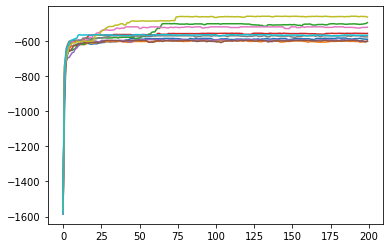

In [ ]:
for e in range(n_experiments):
  plt.plot(pl_list[e])
plt.savefig('plot.pdf', dpi=300, bbox_inches='tight')

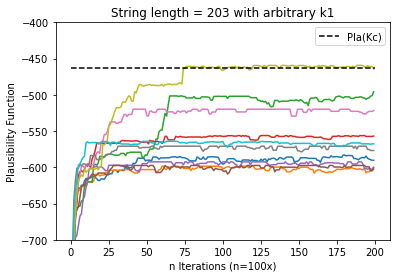

In [ ]:
for e in range(n_experiments):
  plt.plot(pl_list[e])
plt.ylim((-700,-400))
x_coordinates = [0, 200]
y_coordinates = [plausibility(the_inv_key, the_encoded_num), plausibility(the_inv_key, the_encoded_num)]
plt.plot(x_coordinates, y_coordinates,'--', color = 'black', label ='Pla(Kc)')
plt.legend(loc='best')
plt.title('String length = {} with arbitrary k1'.format(len(clear_text)+1))
plt.xlabel('n Iterations (n=100x)')
plt.ylabel('Plausibility Function')
plt.savefig('plot.pdf', dpi=300, bbox_inches='tight')

#### Use relative frequency of letters to construct starting key

In [ ]:
row_sums = np.sum(count_transitions, axis=1)
print(row_sums)

[105859.  35125.   6363.  10500.  18520.  53082.   8975.   7888.  29048.
  30138.    452.   3542.  17145.  11787.  28641.  33475.   6798.    427.
  24502.  27159.  38980.  13074.   4446.  11266.    549.   9431.    149.]


In [ ]:
most_frequent_english = row_sums.argsort()[::-1]
print(most_frequent_english)
print([my_number_to_char(n) for n in most_frequent_english])

[ 0  5 20  1 15  9  8 14 19 18  4 12 21 13 23  3 25  6  7 16  2 22 11 24
 10 17 26]
[' ', 'E', 'T', 'A', 'O', 'I', 'H', 'N', 'S', 'R', 'D', 'L', 'U', 'M', 'W', 'C', 'Y', 'F', 'G', 'P', 'B', 'V', 'K', 'X', 'J', 'Q', 'Z']


In [ ]:
print(the_encoded_num)

[14, 25, 8, 14, 2, 4, 17, 19, 13, 24, 14, 8, 4, 17, 19, 13, 4, 8, 15, 4, 0, 14, 4, 15, 2, 4, 25, 15, 8, 4, 8, 15, 4, 0, 14, 4, 8, 17, 19, 8, 4, 20, 5, 4, 8, 17, 14, 4, 21, 6, 14, 5, 8, 20, 15, 25, 4, 7, 17, 14, 8, 17, 14, 2, 4, 8, 20, 5, 25, 15, 0, 24, 14, 2, 4, 20, 25, 4, 8, 17, 14, 4, 13, 20, 25, 26, 4, 8, 15, 4, 5, 6, 12, 12, 14, 2, 4, 8, 17, 14, 4, 5, 24, 20, 25, 10, 5, 4, 19, 25, 26, 4, 19, 2, 2, 15, 7, 5, 4, 15, 12, 4, 15, 6, 8, 2, 19, 10, 14, 15, 6, 5, 4, 12, 15, 2, 8, 6, 25, 14, 4, 15, 2, 4, 8, 15, 4, 8, 19, 23, 14, 4, 19, 2, 13, 5, 4, 19, 10, 19, 20, 25, 5, 8, 4, 19, 4, 5, 14, 19, 4, 15, 12, 4, 8, 2, 15, 6, 0, 24, 14, 5, 4, 19, 25, 26, 4, 0, 1, 4, 15, 11, 11, 15, 5, 20, 25, 10, 4, 14, 25, 26]


In [ ]:
from collections import Counter
c = Counter(the_encoded_num)
print(c.most_common())
most_frequent_encoded = [x[0] for x in c.most_common()]
print(most_frequent_encoded)

[(4, 39), (8, 20), (14, 19), (15, 18), (25, 13), (19, 13), (5, 13), (2, 12), (17, 8), (20, 8), (6, 6), (0, 5), (12, 5), (13, 4), (24, 4), (26, 4), (10, 4), (7, 2), (11, 2), (21, 1), (23, 1), (1, 1)]
[4, 8, 14, 15, 25, 19, 5, 2, 17, 20, 6, 0, 12, 13, 24, 26, 10, 7, 11, 21, 23, 1]


add the missing symbols

In [ ]:
set(range(27)).difference(set(most_frequent_encoded))

{3, 9, 16, 18, 22}

In [ ]:
most_frequent_encoded = most_frequent_encoded + list(set(range(27)).difference(set(most_frequent_encoded)))
print(most_frequent_encoded)

[4, 8, 14, 15, 25, 19, 5, 2, 17, 20, 6, 0, 12, 13, 24, 26, 10, 7, 11, 21, 23, 1, 3, 9, 16, 18, 22]


Construct a key that maps the most frequent symbol in the encoded message to the most frequent symbol in English text, etc.

For instance:
*  "4" should get mapped to "0" (the spaces)
*  "8" should get mapped to "5" (letter E)

In [ ]:
match_most_frequent = np.empty_like(most_frequent_encoded)
match_most_frequent[most_frequent_encoded] = most_frequent_english

In [ ]:
print(match_most_frequent)

[12 22 14 11  0  8  4  6  5 24 25  7 21 13 20  1 10 19 17  9 18 16 26  2
 23 15  3]


In [ ]:
print(my_numbers_to_string(encode(match_most_frequent, the_encoded_num)))
print(plausibility(match_most_frequent, the_encoded_num))

TOETN SIMWTE SIM EA LT AN OAE EA LT ESIE RH EST PDTHERAO FSTESTN ERHOALWTN RO EST MROC EA HDUUTN EST HWROYH IOC INNAFH AU ADENIYTADH UANEDOT AN EA EIBT INMH IYIROHE I HTI AU ENADLWTH IOC LV AGGAHROY TOC
-845.6883709502331


Same code as above, now with the frequency key as starting guess

In [ ]:
n_experiments = 10
n_runs = 20000
n_record = 100        # record the results every n_record steps

pl_list = np.zeros((n_experiments, n_runs//n_record))
old_pl = plausibility(match_most_frequent, the_encoded_num)
best_key = trial_key
best_pl = old_pl

for e in range(n_experiments):
  # start with a trivial key: no decoding at all
  trial_key = match_most_frequent
  old_pl = plausibility(trial_key, the_encoded_num)
  pl_list[e][0] = old_pl

  for r in range(n_runs):
    # generate a random transposition of two symbol assignments
    switch = rng.choice(27, 2, replace=False)
    new_key = trial_key.copy()
    new_key[switch[0]] = trial_key[switch[1]]
    new_key[switch[1]] = trial_key[switch[0]]

    new_pl = plausibility(new_key, the_encoded_num)
    # print("old p: {:.2f}   new p: {:.2f}".format(old_p, new_p))
    switch_keys = False
    if new_pl > old_pl:
      switch_keys = True
    else:
      alpha = np.exp(new_pl - old_pl)
      if rng.random() < alpha:
        switch_keys = True

    if switch_keys:
      trial_key = new_key.copy()
      if new_pl > best_pl:
        best_pl = new_pl
        best_key = new_key.copy()
      old_pl = new_pl
      # print('/', end='')
    else:
      # print('.', end='')
      pass

    # every n_record steps: report the current state of affairs
    if r % n_record == 0:
      # print("")
      # print("r = {:>6}: Pl = {:5.2f}".format(r, old_pl))
      # print(my_numbers_to_string(encode(trial_key, the_encoded_num)))
      pl_list[e][r // n_record] = old_pl

  print("e = {:>6}: Pl = {:5.2f}".format(e, old_pl))
  print(my_numbers_to_string(encode(trial_key, the_encoded_num)))

e =      0: Pl = -560.69
UDTUS ONKBUT ONK TI MU IS DIT TI MU TONT ER TOU HAURTEID COUTOUS TERDIMBUS ED TOU KEDY TI RALLUS TOU RBEDGR NDY NSSICR IL IATSNGUIAR LISTADU IS TI TNJU NSKR NGNEDRT N RUN IL TSIAMBUR NDY MP IFFIREDG UDY
e =      1: Pl = -495.68
ENMER PATHEM PAT MO CE OR NOM MO CE MPAM IS MPE BUESMION YPEMPER MISNOCHER IN MPE TING MO SUFFER MPE SHINDS ANG ARROYS OF OUMRADEOUS FORMUNE OR MO MAVE ARTS ADAINSM A SEA OF MROUCHES ANG CK OLLOSIND ENG
e =      2: Pl = -530.61
ERMES PIGHEM PIG MA WE AS RAM MA WE MPIM OT MPE BLETMOAR UPEMPES MOTRAWHES OR MPE GORY MA TLDDES MPE THORNT IRY ISSAUT AD ALMSINEALT DASMLRE AS MA MIVE ISGT INIORTM I TEI AD MSALWHET IRY WK ACCATORN ERY
e =      3: Pl = -464.61
ENTER HAKLET HAK TO BE OR NOT TO BE THAT IS THE CUESTION WHETHER TISNOBLER IN THE KING TO SUFFER THE SLINDS ANG ARROWS OF OUTRADEOUS FORTUNE OR TO TAPE ARKS ADAINST A SEA OF TROUBLES ANG BY OMMOSIND ENG
e =      4: Pl = -462.45
ENTER HAYLET HAY TO CE OR NOT TO CE THAT IS THE JUESTION WHETHE

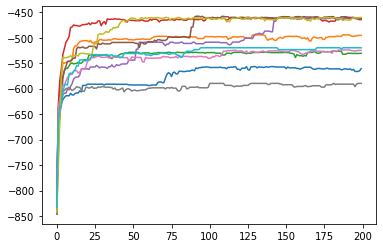

In [ ]:
for e in range(n_experiments):
  plt.plot(pl_list[e])
plt.show()

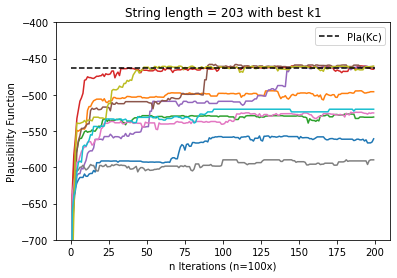

In [ ]:
for e in range(n_experiments):
  plt.plot(pl_list[e])
plt.ylim((-700,-400))
x_coordinates = [0, 200]
y_coordinates = [plausibility(the_inv_key, the_encoded_num), plausibility(the_inv_key, the_encoded_num)]
plt.plot(x_coordinates, y_coordinates,'--', color = 'black', label ='Pla(Kc)')
#plt.plot(0,plausibility(match_most_frequent, the_encoded_num), "or", label = 'Pla(K1)' )
plt.legend(loc='best')
plt.title('String length = {} with best k1'.format(len(clear_text)+1))
plt.xlabel('n Iterations (n=100x)')
plt.ylabel('Plausibility Function')
plt.savefig('plot.pdf', dpi=300, bbox_inches='tight')